In [31]:
# this script takes uses 3 time points (t-5, t-10, t-15) as x values to predict y value t. 
# the mean squared error for both random forest and linear regression is low but this isn't particularly helpful
# considering how long glucose deviations occur. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('glucose.csv')

# drop type and comments columns
df = df.drop(columns=['type', 'comments'])

# combine date and time columns, set datetime as index
df['datetime'] = df['date'].str.cat(df['time'], sep=' ')
df = df.set_index('datetime')
df = df.drop(columns=['date', 'time'])

In [37]:
# df['datetime'] = pd.to_datetime(df['datetime'], unit='s')

df.head()

,glucose
datetime,
2014-10-01 19:14:00,10.3
2014-10-01 19:19:00,9.9
2014-10-01 19:23:00,9.4
2014-10-01 19:24:00,9.8
2014-10-01 19:29:00,9.6


In [38]:
# convert glucose values from mmol/l to mg/dl
df['glucose'] = 18 * df['glucose']
df.head()

,glucose
datetime,
2014-10-01 19:14:00,185.4
2014-10-01 19:19:00,178.2
2014-10-01 19:23:00,169.2
2014-10-01 19:24:00,176.4
2014-10-01 19:29:00,172.8


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '2014-10-06 00:29:02'),
  Text(0.0, 0, '2014-10-01 19:14:00'),
  Text(200.0, 0, '2014-10-02 11:39:00'),
  Text(400.0, 0, '2014-10-03 03:59:00'),
  Text(600.0, 0, '2014-10-03 20:29:01'),
  Text(800.0, 0, '2014-10-04 12:44:01'),
  Text(1000.0, 0, '2014-10-05 05:09:02'),
  Text(1200.0, 0, '2014-10-05 21:24:02'),
  Text(1400.0, 0, '2014-10-06 13:49:02'),
  Text(1600.0, 0, '')])

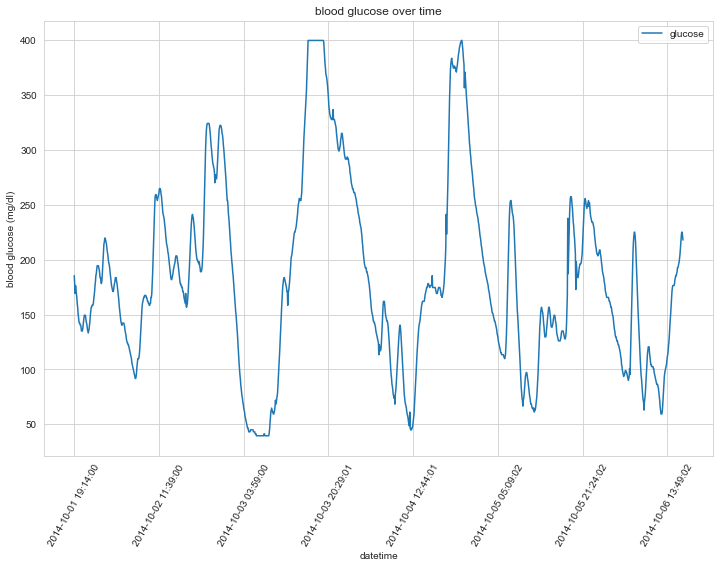

In [44]:
df.plot(figsize=(12,8))
plt.title('blood glucose over time')
plt.ylabel('blood glucose (mg/dl)')
sns.set_style('whitegrid')
plt.xticks(rotation=60)

In [46]:
# create time windows
df['glucose_minus_5']=df['glucose'].shift(+1)
df['glucose_minus_10']=df['glucose'].shift(+2)
df['glucose_minus_15']=df['glucose'].shift(+3)

# drop na values
df=df.dropna()
df

,glucose,glucose_minus_5,glucose_minus_10,glucose_minus_15
datetime,,,,
2014-10-01 19:24:00,176.4,169.2,178.2,185.4
2014-10-01 19:29:00,172.8,176.4,169.2,178.2
2014-10-01 19:34:00,169.2,172.8,176.4,169.2
2014-10-01 19:39:00,165.6,169.2,172.8,176.4
2014-10-01 19:44:00,160.2,165.6,169.2,172.8
...,...,...,...,...
2014-10-06 16:34:02,221.4,216.0,210.6,205.2
2014-10-06 16:39:02,225.0,221.4,216.0,210.6
2014-10-06 16:44:02,225.0,225.0,221.4,216.0


In [50]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [51]:
import numpy as np
x1,x2,x3,y=df['glucose_minus_5'],df['glucose_minus_10'],df['glucose_minus_15'],df['glucose']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[169.2 178.2 185.4]
 [176.4 169.2 178.2]
 [172.8 176.4 169.2]
 ...
 [225.  221.4 216. ]
 [225.  225.  221.4]
 [221.4 225.  225. ]]


In [61]:
# split 70/30 into train and test sets 
X_train_size = int(len(final_x) * 0.7)
set_index = len(final_x) - X_train_size
print(set_index)
X_train,X_test,y_train,y_test=final_x[:-set_index],final_x[-set_index:],y[:-set_index],y[-set_index:]

431


In [62]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/var/folders/sw/bhwsqj457gg7f1ycx1_p1j480000gn/T/ipykernel_65381/1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

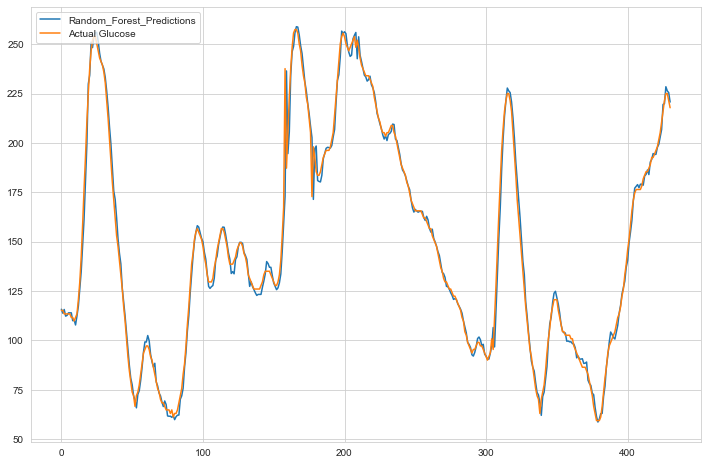

In [63]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

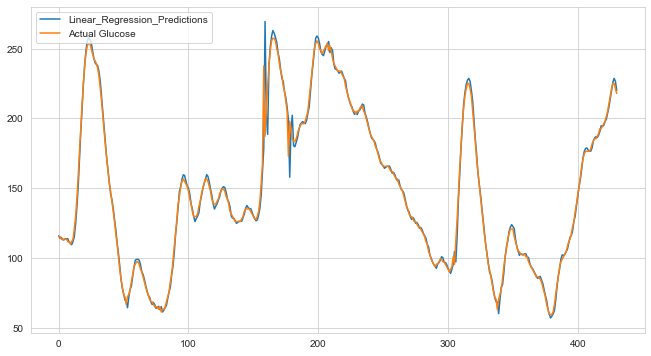

In [64]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [66]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 5.85647003994224
Mean Squared Error for Linear Regression Model is: 6.2741295524348235


In [67]:
# let's take a look at the actual data in the linear regression predicition df
lin_pred_df = pd.DataFrame(lin_pred)
lin_pred_df.tail()

,0
426,220.387318
427,225.771498
428,228.709670
429,226.578280
430,220.028606
